## Những lưu ý khi làm EDA
1. Đi từ tổng quan, dùng mấy cái infor, describe để xem biến số, biến chữ, biến nào đủ, biến nào thiếu
2. Hiểu ý nghĩa của từng biến trong cột, giá trị của chúng. Biến giá trị và biến phụ thuộc (kết quả cuối cùng)
3. Chia các biến thành các nhóm liên quan, có thể theo con người, bên ngoài, ... (thử áp dụng mấy cái model)
4. Phân tích độc lập từng biến (distribution và sự khác biệt giữa nhóm yes và nhóm no)
5. Phân tích sự tương quan giữa các biến (bảng correlation)
### Lưu ý
Để làm cho nhanh, thì dùng mấy cái script có sẵn hét

In [101]:
# Hi this is for practicing EDA with bank marketing database
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep =';')
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank = bank.rename(columns = {'nr.employed' : 'nr_employed','emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx', 'cons.conf.idx':'cons_conf_idx'})
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [12]:
bank.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
bank.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
bank.median()

age                 38.000
duration           180.000
campaign             2.000
pdays              999.000
previous             0.000
emp_var_rate         1.100
cons_price_idx      93.749
cons_conf_idx      -41.800
euribor3m            4.857
nr_employed       5191.000
dtype: float64

In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [32]:
bank_y = bank[bank.y == 'yes']
bank_n = bank[bank.y =='no']
bank_n.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Nhận xét
- Không có giá trị trống

cần phân loại các biến theo từng nhóm

1. Nhóm thông tin cá nhân:'age','job','marital','education','default','housing','loan'
2. Nhóm xã hội: 'emp_var_rate','cons_price_idx','euribor3m','nr_employed'
3. Nhóm chương trình chiến dịch: 'contact','month','day_of_week','duration','campaign','pdays','previous','poutcome' 

In [20]:
bank.month

0        may
1        may
2        may
3        may
4        may
        ... 
41183    nov
41184    nov
41185    nov
41186    nov
41187    nov
Name: month, Length: 41188, dtype: object

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='pdays', ylabel='age'>,
        <AxesSubplot:xlabel='previous', ylabel='age'>,
        <AxesSubplot:xlabel='emp_var_rate', ylabel='age'>,
        <AxesSubplot:xlabel='cons_price_idx', ylabel='age'>,
        <AxesSubplot:xlabel='cons_conf_idx', ylabel='age'>,
        <AxesSubplot:xlabel='euribor3m', ylabel='age'>,
        <AxesSubplot:xlabel='nr_employed', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='pdays', ylabel='duration'>,
        <AxesSubplot:xlabel='previous', ylabel='duration'>,
        <AxesSubplot:xlabel='emp_var_rate', ylabel='duration'>,
        <AxesSubplot:xlabel='cons_price_idx', ylabel='duration'>,
        <AxesSub

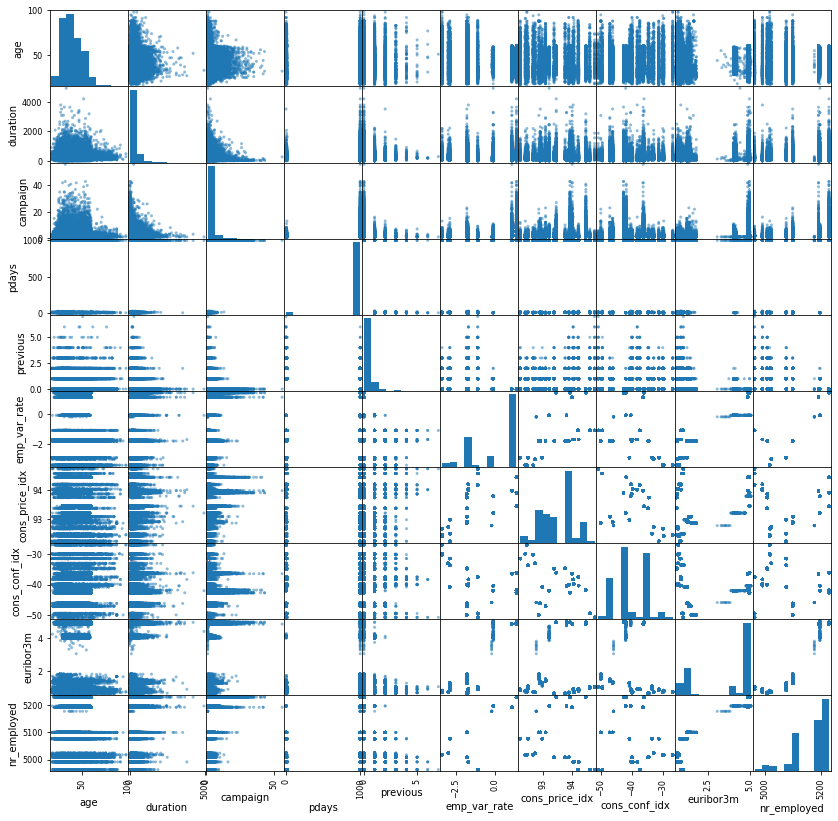

In [16]:
# để nhìn hết một lượt
pd.plotting.scatter_matrix(bank,alpha=0.5, figsize=(14,14))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>, <AxesSubplot:>]],
      dtype=object)

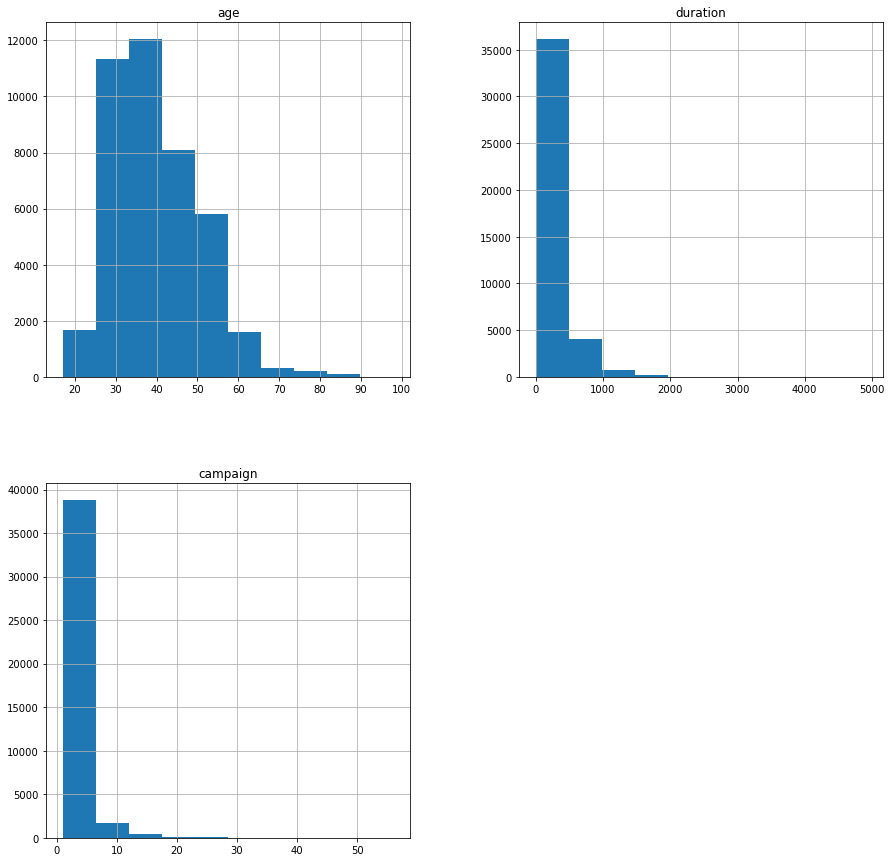

In [26]:
# bank.hist(grid=True, figsize=(15,15))
bank[['age','duration','campaign']].hist(grid=True, figsize=(15,15))

## Phân tích nhóm thông tin cá nhân
'age','job','marital','education','default','housing','loan'

<AxesSubplot:ylabel='Frequency'>

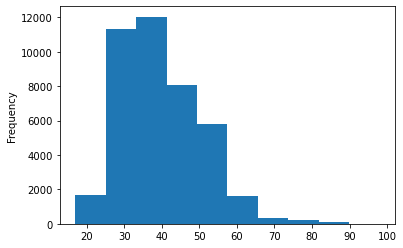

In [27]:
# histogram
# compare yes and no
bank.age.plot.hist()

In [35]:
bank_y['age'].head()

75     41
83     49
88     49
129    41
139    45
Name: age, dtype: int64

No handles with labels found to put in legend.


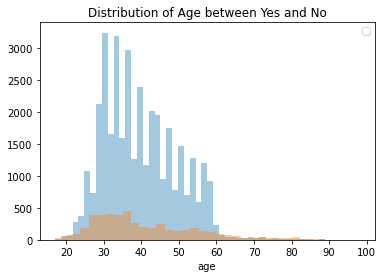

In [44]:
# sns.distplot(bank_y.age,kde=False)
sns.distplot(bank_n.age,kde=False)
sns.distplot(bank_y.age,kde=False)
plt.title('Distribution of Age between Yes and No')
plt.legend()

In [45]:
def visualize_numerical(df, column, target = 'y'):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,4)) # Create 2 charts in 1 row
    
    sns.histplot(df[column], ax=ax1, kde=True);
    ax1.set_xlabel(column);
    ax1.set_ylabel('Density');
    ax1.set_title(f'{column}  Distribution');

    sns.boxplot(x=target, y=column, data=df, showmeans=True, ax=ax2);
    ax2.set_xlabel('Target');
    ax2.set_ylabel(column);
    plt.show()

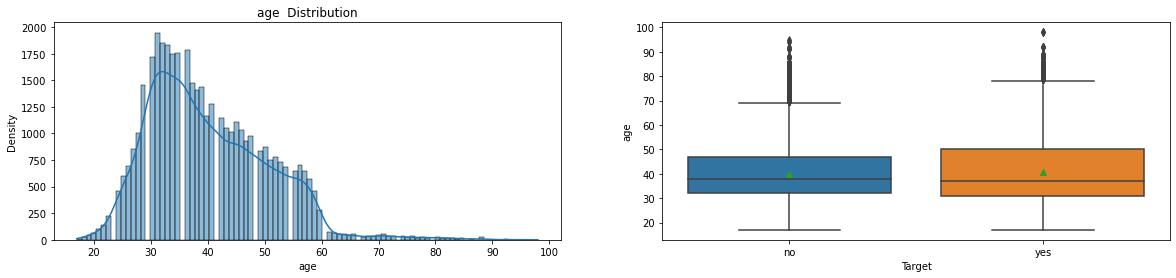

In [48]:
visualize_numerical(bank,'age',target = 'y')

In [54]:
# def visualize_numerical_lst(df, numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',\
#                             'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'], target = 'y'):
#     for column in numerical:
#         visualize_numerical(df,column)
#         print()
# visualize_numerical_lst(bank)

In [56]:
def visualize_categorical(df, column, target = 'y'):
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,4)) 
        data1 = df.groupby(column).size()
        ax1.pie(x=data1 , autopct="%.2f%%",textprops=dict(color='black'), explode=[0.05]*len(data1) , labels=data1.index.tolist(),      pctdistance=0.7, radius=1.1,  startangle=90)
        ax1.set_title(f'{column}  Distribution', loc='center')

        data2 = get_col_target(column, target,df)   
        data2.plot(kind='bar',stacked = True, ax=ax2);
        plt.xticks(rotation=45);        
        plt.show()


def get_col_target(rows, cols,data):
    
    cols_lst = data[cols].unique().tolist()
    rows_lst = data.groupby(rows)[rows].count().sort_values(ascending = False).index.tolist()

    group_df = data.groupby([rows,cols]).size()
    dic = {}
    for item in cols_lst:
        vals = []
        for i in rows_lst:
            try:
                vals.append(group_df.loc[(i, item)])
            except:
                vals.append(0)
            finally:
                continue
        dic[item] = vals

    df = pd.DataFrame(dic,index = rows_lst)
    return(df)

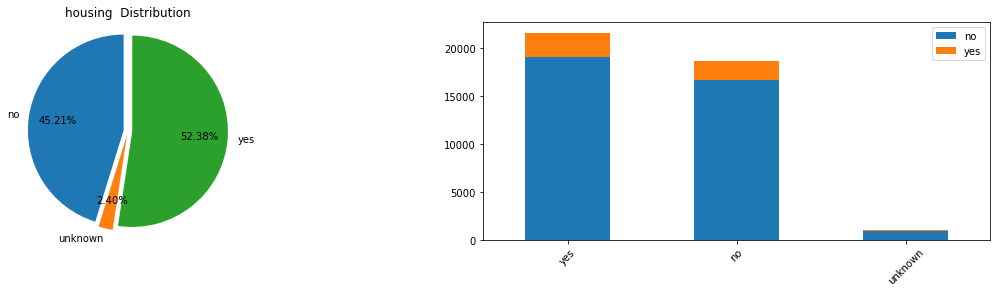

In [57]:
visualize_categorical(bank,'housing')

In [58]:
get_col_target('housing', 'y',bank) 

,no,yes
yes,19069,2507
no,16596,2026
unknown,883,107


In [ ]:
def grou_by_yes(df,column,target):
    

In [99]:
k = bank[['housing','y']].groupby(['housing','y']).size()
k = k.reset_index()
k.set_axis(['housing','y','count'],axis=1).set_index('housing')


,y,count
housing,,
no,no,16596
no,yes,2026
unknown,no,883
unknown,yes,107
yes,no,19069
yes,yes,2507


In [178]:
# để tạo thành biểu đồ cột trồng
new = pd.pivot_table(bank,values='age',index=['housing'],columns=['y'],aggfunc=len)
new = new.sort_values('no',ascending=False)
new

y,no,yes
housing,,
yes,19069,2507
no,16596,2026
unknown,883,107


In [183]:
new['total_row'] = new['no'] + new['yes']
new['per_no'] = new.no/new.total_row*100
new['per_yes'] = new.yes/new.total_row*100
new_2 = new[['per_no','per_yes']]
new_2

y,per_no,per_yes
housing,,
yes,88.380608,11.619392
no,89.120395,10.879605
unknown,89.191919,10.808081


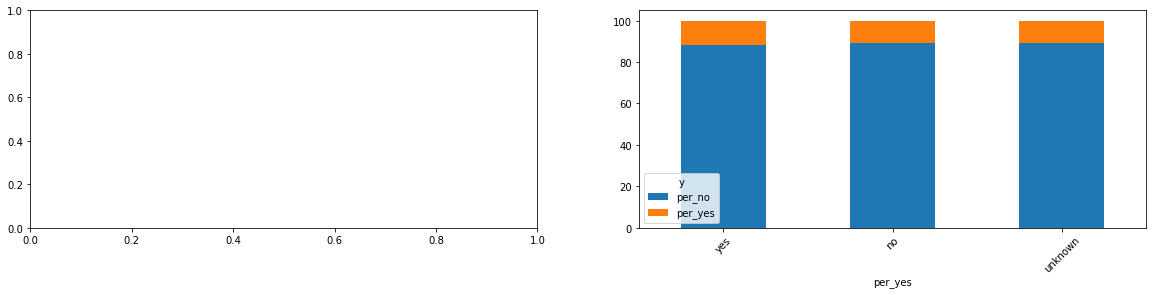

In [168]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,4)) 
data2 = new_2.set_index('housing')
data2.plot(kind='bar',stacked = True, ax=ax2);
plt.xticks(rotation=45);        
plt.show()


In [188]:
# dùng để chia ra biến nào là biến số biến nào là biến chữ
categorical_feature = bank.select_dtypes(exclude = np.number)
numeric_feature = bank.select_dtypes(include = np.number)
categorical_feature


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


<AxesSubplot:>

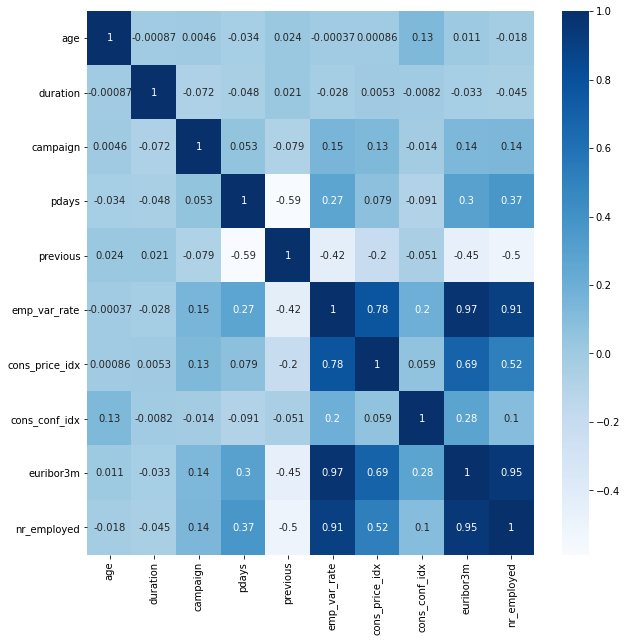

In [189]:
# vẽ heat map để ra được correlation
figsize= (10, 10)
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(numeric_feature.corr(),annot=True,cmap='Blues')
# sns.heatmap(bank,annot=True,cmap='Blues')

In [192]:
# chart này để tính tỉ lệ phần trăm thành công cho các biến categorical
def visualize_categorical_w_success(df, column, target = 'y'):
    
        fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,4))    
        #chart number
        data2 = get_col_target(column, target,df)   
        ax1 = data2.plot(kind='bar',stacked = True, ax=ax1);
        ax1.set_title(f' Quantity distribution by {column}', loc='center')
    
        #chart successing rate
        data = get_col_target(column, target,df)
        data['yes_rate'] = round(data['yes']*100/(data['yes'] + data['no']),2)
        yes_rate_df =  data['yes_rate'].sort_values(ascending = False)

        #Rotation
        sns.barplot(y = yes_rate_df.values, x = yes_rate_df.index, ax=ax2)
        ax2.set_title(f' Successing rate by {column}')
        for ax in fig.axes:
            ax.tick_params(labelrotation=45)

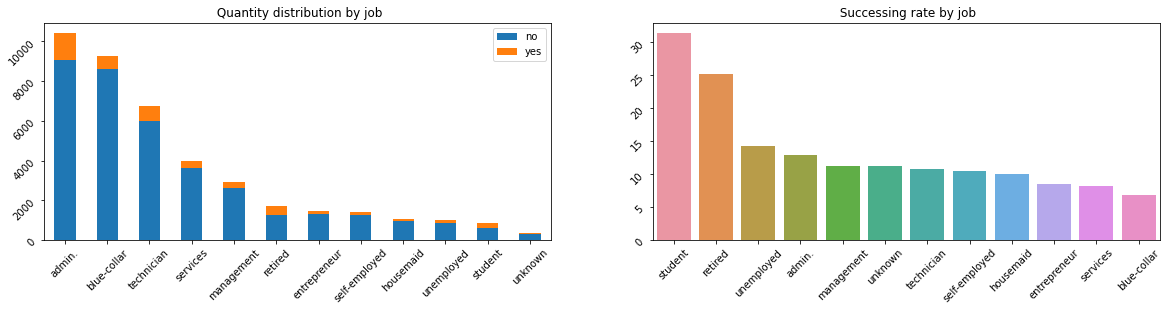

In [191]:
visualize_categorical_w_success(bank,'job')